In [0]:
from google.colab import files
uploaded= files.upload()

Saving Loan payments data.csv to Loan payments data (2).csv


In [0]:
# Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

In [0]:
# Importing the train and test datasets
train_df = pd.read_csv("Loan payments data.csv")


### 3. Exploring the dataset  <a id='explore'>

In [0]:
train_df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   loan_status    500 non-null    int64  
 1   Principal      500 non-null    int64  
 2   terms          500 non-null    int64  
 3   past_due_days  200 non-null    float64
 4   age            500 non-null    int64  
 5   education      500 non-null    int64  
 6   Gender         500 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 27.5 KB


 Descriptive Statistics

In [0]:
train_df.describe()

In [0]:
corr = train_df.corr()
corr

In [0]:
sns.heatmap(corr, annot=True)

### 4. Feature Engineering  <a id='fe'>

In [0]:
# Converting Past due date to numeric value and replacing Nan values with 0
train_df['past_due_days'] = pd.to_numeric(train_df['past_due_days'], errors='coerce')
train_df["past_due_days"].fillna("0", inplace = True)
train_df

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,0,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,0,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,0,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,0,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,0,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1,38,college,female


In [0]:
train_df.info()

In [0]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [0]:
train_df['Gender']=le.fit_transform(train_df['Gender'])
train_df['education']=le.fit_transform(train_df['education'])
train_df['loan_status']=le.fit_transform(train_df['loan_status'])

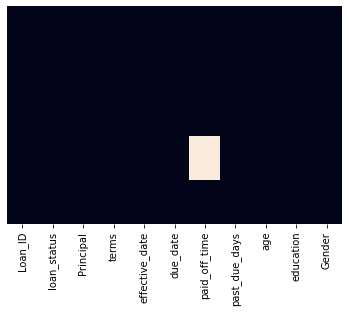

In [0]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False)

In [0]:
train_df.drop('Loan_ID', axis=1, inplace=True)
train_df.drop('effective_date', axis=1, inplace=True)
train_df.drop('due_date', axis=1, inplace=True)
train_df.drop('paid_off_time', axis=1, inplace=True)

train_df.head()

,loan_status,Principal,terms,past_due_days,age,education,Gender
0,2,1000,30,0,45,1,1
1,2,1000,30,0,50,0,0
2,2,1000,30,0,33,0,0
3,2,1000,15,0,27,3,1
4,2,1000,30,0,28,3,0


In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   loan_status    500 non-null    object 
 1   Principal      500 non-null    int64  
 2   terms          500 non-null    int64  
 3   past_due_days  200 non-null    float64
 4   age            500 non-null    int64  
 5   education      500 non-null    object 
 6   Gender         500 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 27.5+ KB


In [0]:
#data prep done now build decission tree

### 5. Decision Tree  <a id='dt'>

In [0]:
# Separating the features (x) and labels (y)
# Separating the features and labels



columns = ["past_due_days", "age", "education", "Gender"]
x = train_df[list(columns)].values

y = train_df['loan_status']
print(x)
print(y)


[['0' 45 1 1]
 ['0' 50 0 0]
 ['0' 33 0 0]
 ...
 [3.0 30 3 1]
 [1.0 38 3 0]
 [8.0 28 1 1]]
0      2
1      2
2      2
3      2
4      2
      ..
495    1
496    1
497    1
498    1
499    1
Name: loan_status, Length: 500, dtype: int64


In [0]:
# Importing the packages for Decision Tree Classifier

from sklearn import tree
my_tree_2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
my_tree_2

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

This shows all the hyperparameters of Decision Tree model

### 5.1 Training Decision Tree Model  <a id='tdt'>

In [0]:
# Fit the decision tree model on your features and label

my_tree_2= my_tree_2.fit(x, y)

In [0]:
# The feature_importances_ attribute make it simple to interpret the significance of the predictors you include

list(zip(columns,my_tree_2.feature_importances_))

[('past_due_days', 1.0), ('age', 0.0), ('education', 0.0), ('Gender', 0.0)]

In [0]:
# The accuracy of the model
# Max Depth = 4 and Ceterion= Entropy
print(my_tree_2.score(x, y))

0.986


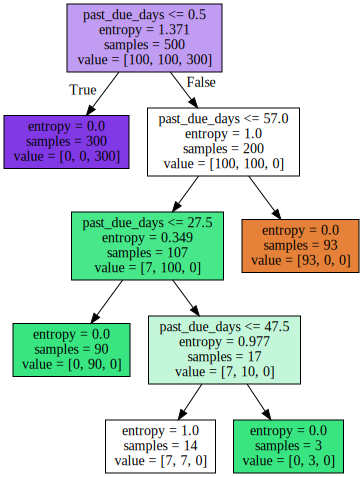

In [0]:
# Visualize the decision tree graph

with open('tree2.dot','w') as dotfile:
    tree.export_graphviz(my_tree_2, out_file=dotfile, feature_names=columns, filled=True)
    dotfile.close()
    
# You may have to install graphviz package using 
# conda install graphviz
# conda install python-graphviz

from graphviz import Source

with open('tree2.dot','r') as f:
    text=f.read()
    plot=Source(text)
plot   

### 5.3 Evaluating the Decision Tree Model  <a id='edt'>

In [0]:
#Print Confusion matrix on Train Data
from sklearn import metrics

pred = my_tree_2.predict(x)
df_confusion = metrics.confusion_matrix(y, pred)
df_confusion

array([[100,   0,   0],
       [  7,  93,   0],
       [  0,   0, 300]])

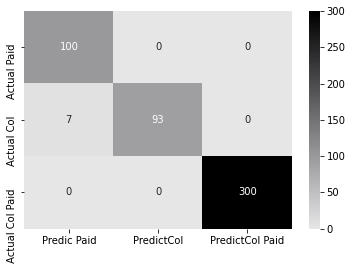

In [0]:
cmap = sns.cubehelix_palette(200, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(df_confusion,cmap = cmap,xticklabels=['Predic Paid' , 'PredictCol' , 'PredictCol Paid'] ,yticklabels=['Actual Paid','Actual Col' ,' Actual Col Paid'], annot=True,
            fmt='d')

### 6. Random Forest  <a id='rf'>

In [0]:
# Building and fitting Random Forest

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth = 10, n_estimators = 100, random_state = 1)

### 6.1 Training Random Forest Model  <a id='trf'>

In [0]:
# Fitting the model on Train Data

my_forest = forest.fit(x, y)

In [0]:
# Print the accuracy score of the fitted random forest

print(my_forest.score(x, y))

0.998


 ### 6.2 Predictions from Random Forest Model   <a id='prf'>

In [0]:
# Making predictions

pred = my_forest.predict(x)

In [0]:
list(zip(columns,my_forest.feature_importances_))

[('past_due_days', 0.9529130345565927),
 ('age', 0.031919231519068496),
 ('education', 0.008981907063426083),
 ('Gender', 0.0061858268609127675)]

### 6.3 Evaluating the Random Forest Model   <a id='erf'>

In [0]:
df_confusion_rf = metrics.confusion_matrix(y, pred)
df_confusion_rf

array([[100,   0,   0],
       [  1,  99,   0],
       [  0,   0, 300]])

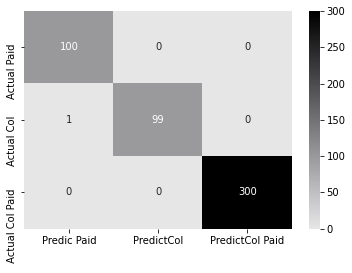

In [0]:
cmap = sns.cubehelix_palette(200, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(df_confusion_rf,cmap = cmap,xticklabels=['Predic Paid' , 'PredictCol' , 'PredictCol Paid'] ,yticklabels=['Actual Paid','Actual Col' ,' Actual Col Paid'], annot=True,
            fmt='d')

### 7. Appendix  <a id = 'appendix'>

Using Algorithms to choose best parameters

Grid-searching is the process of scanning the data to configure optimal parameters for a given model.  <br>
Applying Grid Search on a Decision Tree Model and Randomised Search for Random Forest. Building models with different combinations of these parameters and come up with the best model.  Consolidated summary given as ppt.


In [0]:
# Different parameters we want to test

max_depth = [5,10,15] 
criterion = ['gini', 'entropy']

In [0]:
# Importing GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [0]:
# Building the model

my_tree_three = tree.DecisionTreeClassifier()

# Cross-validation tells how well a model performs on a dataset using multiple samples of train data
grid = GridSearchCV(estimator = my_tree_three, cv=3, 
                    param_grid = dict(max_depth = max_depth, criterion = criterion))

In [0]:
grid.fit(x,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [0]:
# Best accuracy score

grid.best_score_

0.9799557511483058

In [0]:
grid

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [0]:
# Best parameters for the model

grid.best_params_

{'criterion': 'gini', 'max_depth': 10}

In [0]:
# Building the model based on new parameters

my_tree_three = tree.DecisionTreeClassifier(criterion= 'gini', max_depth= 10, random_state=42)

In [0]:
my_tree_three.fit(x,y)

In [0]:
# Accuracy Score for new model basis Optimised Grid Search Values

my_tree_three.score(x,y)

0.998

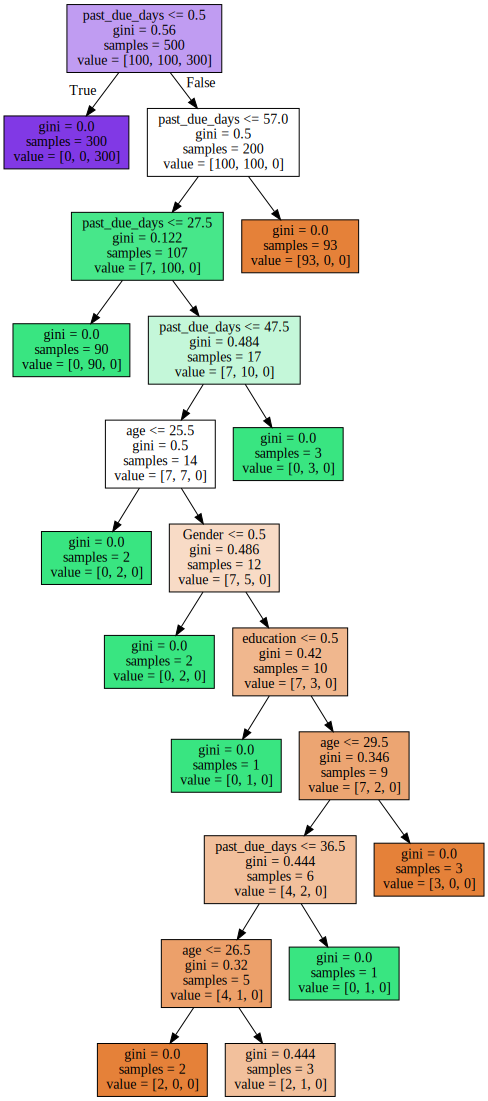

In [0]:
# Visualize the decision tree graph

with open('tree1.dot','w') as dotfile:
    tree.export_graphviz(my_tree_three, out_file=dotfile, feature_names=columns, filled=True)
    dotfile.close()
    

#from graphviz import Source

with open('tree1.dot','r') as f:
    text=f.read()
    plot=Source(text)
plot   

**Randomized Search**

Using Randomized Search, we can define a grid of hyperparameters and randomly sample from the grid to get the best combination of values. <br>
Lets apply Randomized search on Random Forest model. This model has plenty of parameters like number of trees, depth of trees...etc. We will evaluate models with different parameters and come up with the best model.

In [0]:
# Different parameters we want to test

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [0]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [0]:
# Importing RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

In [0]:
forest_two = RandomForestClassifier()

# Fitting 3 folds for each of 100 candidates, totalling 300 fits
rf_random = RandomizedSearchCV(estimator = forest_two, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42)

In [0]:
rf_random.fit(x,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.4s
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.4s
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.4s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   1.4s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   1.3s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1000, min_sa

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  3.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [0]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 90,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 288}

A Random Forest model built with this hyperparameters will provide best accuracy

In [0]:
rf_random.best_score_

0.9819517591323378

### The End